In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
x = np.random.normal(loc=[-1, 1, 2], scale=[0.5, 0.5, 0.5], size=(100000, 3))
y = np.sin(x)

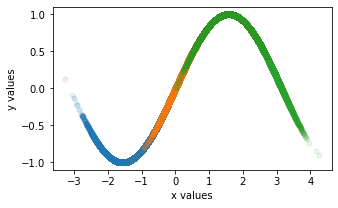

In [37]:
plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='o', linewidth=0, markersize=5, alpha=0.1)
plt.xlabel('x values')
plt.ylabel('y values');

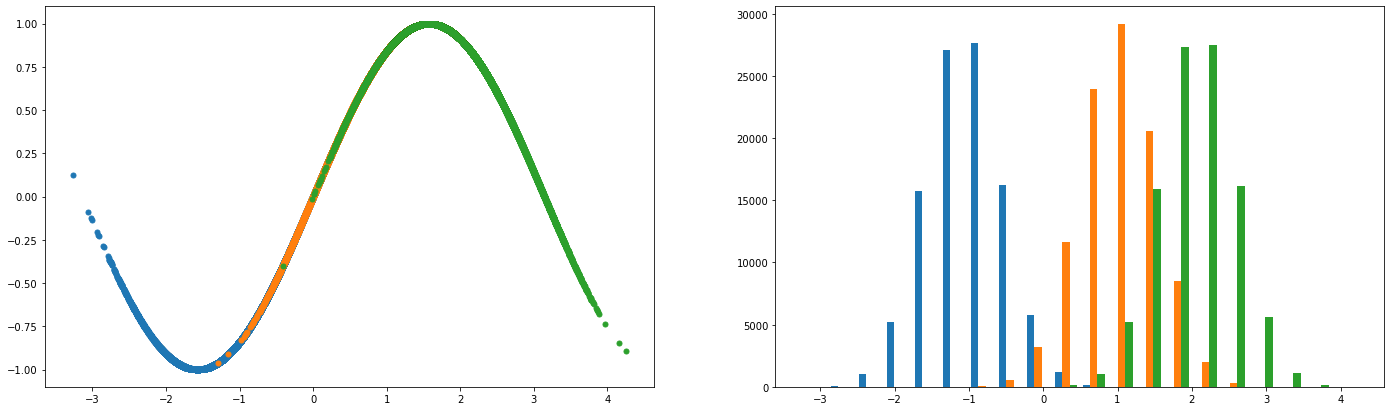

In [38]:
plt.figure(figsize=(24, 7))
plt.subplot(1, 2, 1) # 121 means 1 line, 2 column, 1st plot
plt.plot(x, y, marker='o', markersize=5, linewidth=0.0)
plt.subplot(1, 2, 2) # 122 means 1 line, 2 column, 2nd plot
plt.hist(x, bins=20);

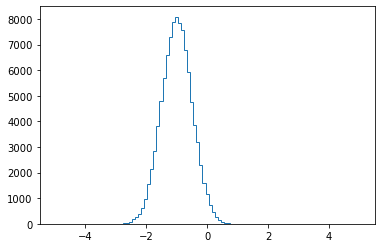

In [44]:
a = x[:, 0]
plt.hist(a, bins=np.linspace(-5, 5, 100), histtype='step');

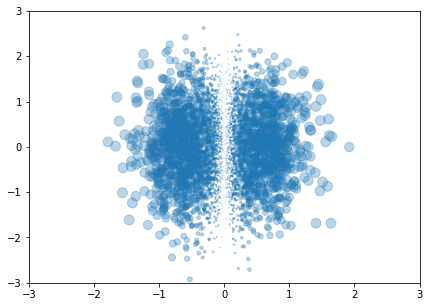

In [48]:
points = np.random.normal(loc=[0, 0], scale=[0.5, 0.8], size=(5000,2))
x, y = points[:, 0], points[:, 1]

plt.figure(figsize=(7,5))
plt.scatter(x, y, s=100*(np.sin(x))**2, marker='o', alpha=0.3)
plt.xlim(-3, 3)
plt.ylim(-3, 3);

In [49]:
data = np.random.normal(size=(1000, 3))
r0 = np.array([1, 4, 2])
data_trans = data + r0

xi, yi, zi = data[:,0], data[:,1], data[:,2]
xf, yf, zf = data_trans[:,0], data_trans[:,1], data_trans[:,2]

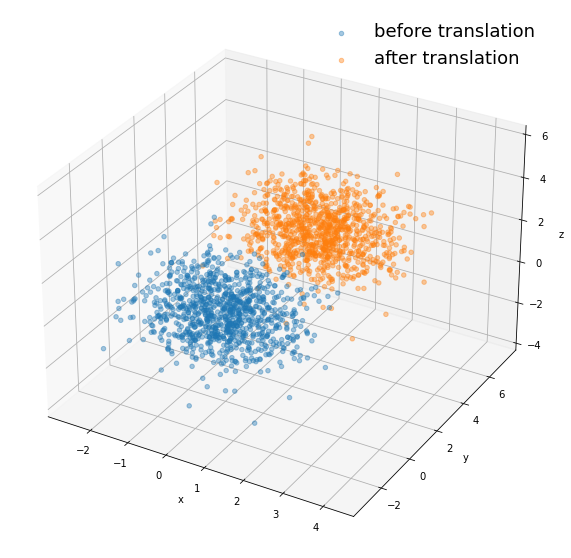

In [50]:
from mpl_toolkits import mplot3d
plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(xi, yi, zi, alpha=0.4, label='before translation')
ax.scatter3D(xf, yf, zf, alpha=0.4, label='after translation')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(frameon=False, fontsize=18);

In [56]:
def my_surface(x, y):
    x0 = 5*np.sin(y)
    sigma = 5+y
    amp = (10-y)
    return amp*np.exp(-(x-x0)**2/sigma**2)

x = np.linspace(-40, 40, 100)
y = np.linspace(0, 20, 100)
z = my_surface(x, y)
print(x.shape, y.shape, z.shape)

(100,) (100,) (100,)


(100, 100) (100, 100) (100, 100)


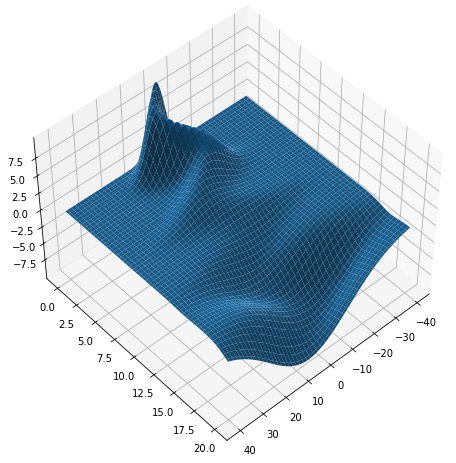

In [61]:
xx, yy = np.meshgrid(x, y)
zz = my_surface(xx, yy)
print(xx.shape, yy.shape, zz.shape)

# Plotting
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, zz)
ax.view_init(azim=48, elev=48);

In [66]:
a, b = np.array([0, 1, 2]), np.array([3, 4, 5, 6])
aa, bb = np.meshgrid(a, b)

In [73]:
print(aa.flatten(), bb.flatten())

[0 1 2 0 1 2 0 1 2 0 1 2] [3 3 3 4 4 4 5 5 5 6 6 6]


In [75]:
for i, j in zip(aa.flatten(), bb.flatten()):
    print(i, j, my_surface(i, j))

0 3 6.9457565736717966
1 3 6.990526738576099
2 3 6.819123269178923
0 4 5.027811362655821
1 4 4.523141103140289
2 4 3.969885460196474
0 5 3.9731291026152653
1 5 3.573914679259512
2 5 3.151155201889788
0 6 3.9359944602521404
1 6 3.814489794093434
2 6 3.636135131943127


In [100]:
import pandas as pd
df = pd.read_csv('Downloads/WaveData.txt')
df.head()

,Date/Time,Hs,Hmax,Tz,Tp,Peak Direction,SST
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


In [101]:
old_new_cols = {
    'Date/Time': 'date',
    'Hs': 'height',
    'Hmax': 'heightMax',
    'Tz': 'period',
    'Tp': 'energy',
    'Peak Direction': 'direction',
    'SST': 'temperature'
}

df.rename(columns=old_new_cols, inplace=True)

In [102]:
df.head()

,date,height,heightMax,period,energy,direction,temperature
0,01/01/2017 00:00,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,01/01/2017 00:30,0.875,1.39,4.421,4.506,-99.9,-99.90
2,01/01/2017 01:00,0.763,1.15,4.520,5.513,49.0,25.65
3,01/01/2017 01:30,0.770,1.41,4.582,5.647,75.0,25.50
4,01/01/2017 02:00,0.747,1.16,4.515,5.083,91.0,25.45


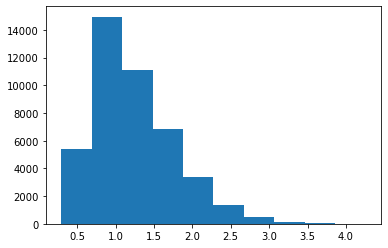

In [103]:
plt.hist(df.height[df.height>0]);

In [104]:
colsToKepp = ['height', 
              'heightMax', 
              'period', 
              'energy', 
              'direction', 
              'temperature',
             ]
dfNumbers = df[colsToKepp]
dfNumbers.head()

,height,heightMax,period,energy,direction,temperature
0,-99.900,-99.90,-99.900,-99.900,-99.9,-99.90
1,0.875,1.39,4.421,4.506,-99.9,-99.90
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45


In [105]:
for c in dfNumbers.columns:
    dfNumbers = dfNumbers[dfNumbers[c]>-99]
    
dfNumbers.head()

,height,heightMax,period,energy,direction,temperature
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50


In [107]:
np.count_nonzero(dfNumbers==-99)

0

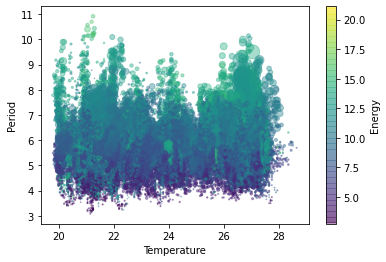

In [111]:
plt.scatter(dfNumbers.temperature, 
            dfNumbers.period , 
            s=dfNumbers.heightMax**3, 
            c=dfNumbers.energy, 
            alpha=0.4)

plt.colorbar(label='Energy')
plt.xlabel('Temperature')
plt.ylabel('Period');

In [112]:
dfNumbers.head()

,height,heightMax,period,energy,direction,temperature
2,0.763,1.15,4.520,5.513,49.0,25.65
3,0.770,1.41,4.582,5.647,75.0,25.50
4,0.747,1.16,4.515,5.083,91.0,25.45
5,0.718,1.61,4.614,6.181,68.0,25.45
6,0.707,1.34,4.568,4.705,73.0,25.50


In [113]:
def predicted_period(e, d, t):
    return e**2 / (d+1) + 2*t

In [114]:
dfNumbers['predicted_period'] = predicted_period(dfNumbers.energy, 
                                                 dfNumbers.direction, 
                                                 dfNumbers.temperature)

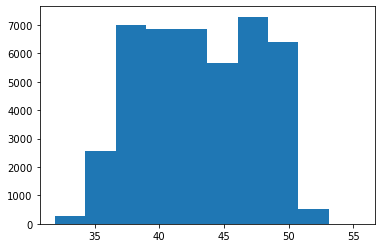

In [117]:
plt.hist(dfNumbers.predicted_period - dfNumbers.period);

In [118]:
dfNumbers.head()

,height,heightMax,period,energy,direction,temperature,predicted_period
2,0.763,1.15,4.520,5.513,49.0,25.65,51.907863
3,0.770,1.41,4.582,5.647,75.0,25.50,51.419587
4,0.747,1.16,4.515,5.083,91.0,25.45,51.180836
5,0.718,1.61,4.614,6.181,68.0,25.45,51.453692
6,0.707,1.34,4.568,4.705,73.0,25.50,51.299149


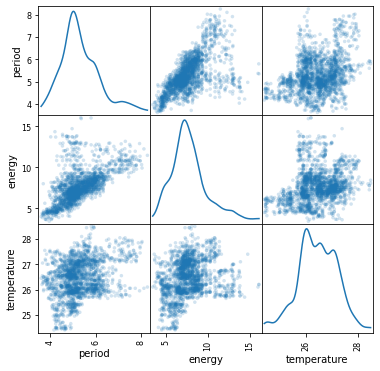

In [121]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfNumbers[['period', 'energy', 'temperature']][:2000], figsize=(6, 6), alpha=0.2, s=50, diagonal='kde');

In [122]:
from scipy import optimize
from scipy import stats

In [123]:
Npoints, Nsampling = 20, 1000
xcont = np.linspace(-5.0, 3.5, Nsampling)
x = np.linspace(-5, 3.0, Npoints)
y = 2*(np.sin(x/2)**2 + np.random.random(Npoints)*0.3)
dy = np.sqrt(0.10**2 + (0.10*y)**2)

In [128]:
def pol1(x, p0, p1):
    return p0 + x*p1

p, cov = optimize.curve_fit(pol1, x, y, sigma=dy)

In [129]:
print(p)
print(cov)

[ 0.95924458 -0.03373047]
[[0.02432138 0.00372182]
 [0.00372182 0.00444898]]


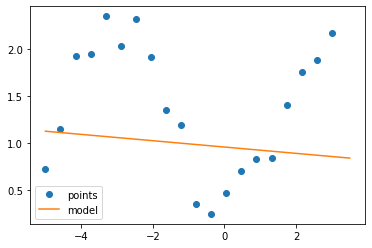

In [132]:
plt.plot(x, y, 'o', label='points');
plt.plot(xcont, pol1(xcont, *p), label='model')
plt.legend();

In [133]:
def pol_func(x, *coeff):
    '''
    Arbitrary degree polynom: f(x) = a0 + a1*x + a2*x^2 + ... aN*x^N
    '''
    a = np.array([p*x**i for i, p in enumerate(coeff)])
    return np.sum(a)

pol_func = np.vectorize(pol_func)

In [137]:
def fit_polynom(degree):
    nPars = degree+1
    p0, pmin, pmax = [1.0]*nPars, [-10]*nPars, [10]*nPars
    fit_options = {'p0': p0, 'bounds': (pmin, pmax), 'check_finite': True}
    par, cov = optimize.curve_fit(pol_func, x, y, sigma=dy, **fit_options)
    return par, cov

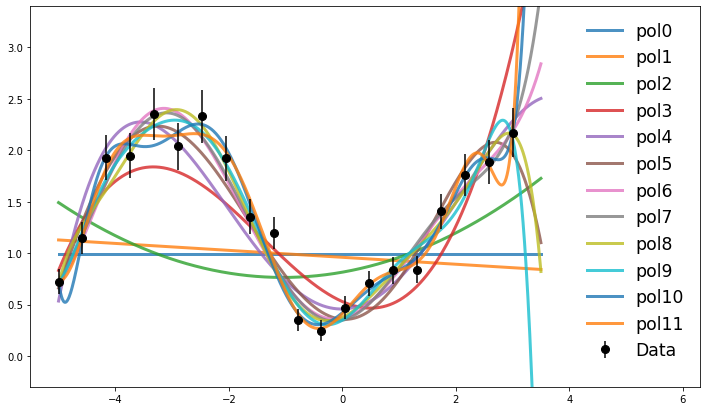

In [138]:
# Figure for the result
fig = plt.figure(figsize=(12,7))

# Fitting & plotting 
for d in np.arange(0, 12):
    par, cov = fit_polynom(d)
    plt.plot(xcont, pol_func(xcont, *par), label='pol{}'.format(d), 
             linewidth=3, alpha=0.8)

# Plotting data
style = {'marker': 'o', 'color': 'black', 'markersize': 8,
         'linestyle': '', 'zorder': 10, 'label': 'Data'}
plt.errorbar(x, y, yerr=dy, **style)

# Plot cosmetics
plt.xlim(-5.5, 6.3)
plt.ylim(-0.3, 3.4)
plt.legend(frameon=False, fontsize='xx-large');